<div style="background-color: #c1f2a5">


# PS2

In this problem set, you will program a Rescorla-Wagner model and see how it captures some conditioning phenomena.

# Instructions

Remember to do your problem set in Python 3. Fill in `#YOUR CODE HERE`.

Make sure: 
- that all plots are scaled in such a way that you can see what is going on, and 
- that the general patterns are fairly represented.
- to label all x- and y-axes, and to include a title and
- to plot from $V_{x}(0)$ when plotting $V_x(t+1)$ as a function of trials.

</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<span style='background:yellow'>**In all of the questions below, please use $\alpha_{light}=0.5$, $\beta=0.1$ *unless* otherwise specified:**</span> 

## Q1.1 [10pts, HELP] 
Suppose that we repeatedly pair a light with food. Plot the association strength between light and food according to the **full Rescorla-Wagner model** with an initial association of $V_{light}(0) = 0.05$ and an initial association of $V_{light}(0) = 0.50$ (as two separate dotted lines on the same plot). Plot 20 trials. Be sure to include a legend for these two different conditions.

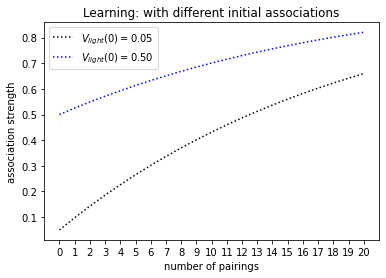

In [2]:
#YOUR CODE HERE
def r_w(lst_assoc, learning_rate, saliency, reinf_oc, other_prev_assoc, rem_trials):
    if rem_trials == 0:
        return lst_assoc
    else:
        lst_assoc.append(lst_assoc[-1] + learning_rate * saliency * (reinf_oc - (lst_assoc[-1] + other_prev_assoc)))
        return r_w(lst_assoc, learning_rate, saliency, reinf_oc, other_prev_assoc, rem_trials - 1)

association_1 = r_w([0.05], 0.1, 0.5, 1, 0, 20)
association_2 = r_w([0.50], 0.1, 0.5, 1, 0, 20)
trials = np.arange(0, 21)


figure, axis = plt.subplots()

#YOUR CODE HERE
axis.plot(trials, association_1, 'k:', label='$V_{light}(0) = 0.05$')
axis.plot(trials, association_2, 'b:', label='$V_{light}(0) = 0.50$')
axis.set_xlabel("number of pairings")
axis.set_ylabel("association strength")
axis.set_xticks(trials)
axis.set_title("Learning: with different initial associations")
plt.legend()


figure.savefig('PS2_Q1_1.png')

## Q1.2. [3pts, SOLO] 
How many trials will it take to reach $V_{light}$ = 0.8 if the initial association $V_{light}(0)$ is 0.05? Plot the association strength for this number of trials. (Hint: You may want to use a "while" loop to solve this problem. That said, feel free to take other approaches.)

A total of 31 trials are needed.


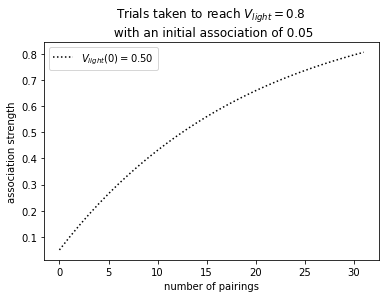

In [3]:
#YOUR CODE HERE
def r_w_find_trials(lst_assoc, learning_rate, saliency, reinf_oc, other_prev_assoc, total_trials, threshold):
    if lst_assoc[-1] >= threshold:
        return total_trials, lst_assoc
    else:
        lst_assoc.append(lst_assoc[-1] + learning_rate * saliency * (reinf_oc - (lst_assoc[-1] + other_prev_assoc)))
        return r_w_find_trials(lst_assoc, learning_rate, saliency, reinf_oc, other_prev_assoc, total_trials + 1, threshold)

total_trials, lst_assoc = r_w_find_trials([0.05], 0.1, 0.5, 1, 0, 0, 0.8)
print('A total of ' + str(total_trials) + ' trials are needed.')


figure, axis = plt.subplots()

#YOUR CODE HERE
trials = np.arange(0, total_trials + 1)
axis.plot(trials, lst_assoc, 'k:', label='$V_{light}(0) = 0.50$')
axis.set_xlabel("number of pairings")
axis.set_ylabel("association strength")
axis.set_title("Trials taken to reach $V_{light} = 0.8$ \n with an initial association of 0.05")
plt.legend()

figure.savefig('PS2_Q1_2.png')

## Q1.3. [5pts, SOLO] 
Suppose that starting from an initial association of $V_{light}(0) = 0.0$, it takes a 16 trials for the association between a light and food to exceed 0.8, what is the salience of light ($\alpha_{light}$)? It is acceptable to solve this problem numerically. Please either copy your code (if solved programmatically) or write down steps in which you solved for $a_{light}$ (if solved numerically) into Gradescope.

In [4]:
#YOUR CODE HERE
def r_w_find_saliency():
    saliency_try = 0.5
    association_16 = r_w([0.0], 0.1, saliency_try, 1, 0, 16)[-1]
    while association_16 <= 0.8:
        saliency_try += 0.001
        association_16 = r_w([0.0], 0.1, saliency_try, 1, 0, 16)[-1]
    return saliency_try

r_w_find_saliency()

0.9570000000000004

## Q2. [10pts, SOLO] 
Suppose that you begin with an association between a light and food of $V_{light}(0) = 0.8$. Now, you want to teach a new association between a bell and food while the light is present (thus you pair light, food, and bell all together). Plot the association strength between bell and food $V_{bell}$ as a function of the number of trials when $\alpha_{bell}=0.2$. Plot 30 trials.

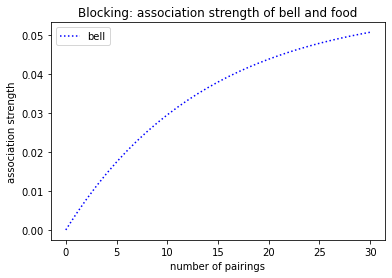

In [5]:
#YOUR CODE HERE
def r_w_blocking(lst_assoc, other_lst_assoc, trials, saliency, other_saliency):
    i = 0
    while i < trials:
        lst_assoc.append(lst_assoc[-1] + 0.1 * saliency * (1 - (lst_assoc[-1] + other_lst_assoc[-1])))
        other_lst_assoc.append(other_lst_assoc[-1] + 0.1 * other_saliency * (1 - (other_lst_assoc[-1] + lst_assoc[-2])))
        i += 1
    return lst_assoc, other_lst_assoc
        
light_association, bell_association = r_w_blocking([0.8], [0.0], 30, 0.5, 0.2)


figure, axis = plt.subplots()

#YOUR CODE HERE
trials = np.arange(0, 31)
# axis.plot(trials, light_association, 'k:', label='light')
axis.plot(trials, bell_association, 'b:', label='bell')
axis.set_xlabel("number of pairings")
axis.set_ylabel("association strength")
axis.set_title("Blocking: association strength of bell and food")
plt.legend()

figure.savefig('PS2_Q2.png')

## Q3.1. [10pts, HELP] 
Suppose that you repeatedly alternate trials such that a bell is paired with food on one trial and no food on the next. What will the association strength be if you keep doing this for a long time? Please:
1. Plot 50 trials of what will happen (assuming $V_{bell}(0) = 0$ and $\alpha_{bell} = 0.2$);
2. Provide an intuitive explanation for why that may be the case.

(No light is present this time. Same for Q3.2.) 

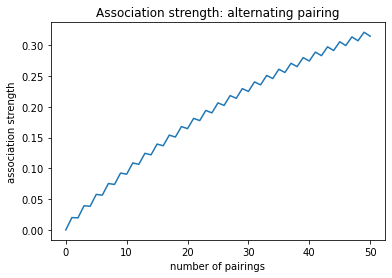

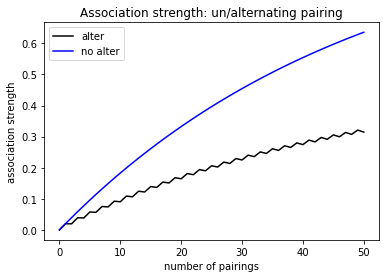

In [6]:
#YOUR CODE HERE
def r_w_alter(lst_assoc, saliency, trials):
    i = 0
    while i < trials:
        if i % 2 == 0:
            lst_assoc.append(lst_assoc[-1] + 0.1 * saliency * (1 - lst_assoc[-1]))
        else:
            lst_assoc.append(lst_assoc[-1] + 0.1 * saliency * (0 - lst_assoc[-1]))
        i += 1
    return lst_assoc

association_alter = r_w_alter([0.0], 0.2, 50)
    
    
figure, axis = plt.subplots()

#YOUR CODE HERE
trials = np.arange(0, 51)
axis.plot(trials, association_alter)
axis.set_xlabel("number of pairings")
axis.set_ylabel("association strength")
axis.set_title("Association strength: alternating pairing")

figure.savefig('PS2_Q3_1.png')



association_no_alter = r_w([0.0], 0.1, 0.2, 1, 0, 50)
figure1, axis1 = plt.subplots()
axis1.plot(trials, association_alter, 'k', label = 'alter')
axis1.plot(trials, association_no_alter, 'b', label = 'no alter')
axis1.set_xlabel("number of pairings")
axis1.set_ylabel("association strength")
axis1.set_title("Association strength: un/alternating pairing")
plt.legend()

## Q3.2. [5pts, SOLO] 

Suppose that, on a given trial, you pair a bell with food with probability $P$ and no food with probability $(1-P)$. What will the association strength be after many (e.g., 100) trials of this? (Again, assuming $V_{bell}(0) = 0$ and $\alpha_{bell} = 0.2$)

1. First, explain your thoughts in 2-3 sentences in Gradescope;
2. Then, in the same figure, generate 3 subplots for 3 different values of $P$. Use 100 trials for all subplots and $P =$ 0.2, 0.6, 0.8 for each subplot, respectively. Make sure to indicate the value of $P$ in the corresponding subplot title. (Format your subplots as **3 rows and 1 column**. Please use an overall figure size of (7,15) for the total figure object.)

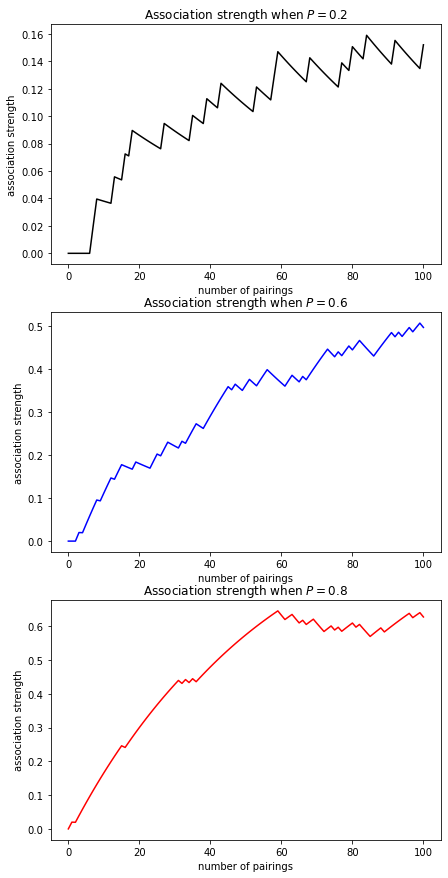

In [7]:
#YOUR CODE HERE
def r_w_prob(lst_assoc, saliency, trials, prob):
    i = 0
    while i < trials:
        reinf_oc = np.random.choice([0, 1], p = [1 - prob, prob])
        lst_assoc.append(lst_assoc[-1] + 0.1 * saliency * (reinf_oc - lst_assoc[-1]))
        i += 1
    return lst_assoc

assoc_2 = r_w_prob([0.0], 0.2, 100, 0.2)
assoc_6 = r_w_prob([0.0], 0.2, 100, 0.6)
assoc_8 = r_w_prob([0.0], 0.2, 100, 0.8)
trials = np.arange(0, 101)


figure, (axis1, axis2, axis3) = plt.subplots(3, 1, figsize=(7,15))

#YOUR CODE HERE
axis1.plot(trials, assoc_2, 'k')
axis1.set_xlabel("number of pairings")
axis1.set_ylabel("association strength")
axis1.set_title("Association strength when $P = 0.2$")

axis2.plot(trials, assoc_6, 'b')
axis2.set_xlabel("number of pairings")
axis2.set_ylabel("association strength")
axis2.set_title("Association strength when $P = 0.6$")

axis3.plot(trials, assoc_8, 'r')
axis3.set_xlabel("number of pairings")
axis3.set_ylabel("association strength")
axis3.set_title("Association strength when $P = 0.8$")
#YOUR CODE HERE
    
figure.savefig('PS2_Q3_2.png')

<div style="background-color: #c1f2a5">

# Submission

### <span style="color:red">Attention! New code submission requirement!</span>   
    
When you're done with your problem set, do the following:
- Upload your answers in Gradescope's PS2.
- Convert your Jupyter Notebook into a `.py` file by doing so:    
    
</div>


<center>    
  <img src="https://www.dropbox.com/s/7s189m4dsvu5j65/instruction.png?dl=1" width="300"/>
</center>

<div style="background-color: #c1f2a5">
    
- Submit the `.py` file you just created in Gradescope's PS2-code.
    
</div>        




</div>
